![image.png](../background_photos/)
[լուսանկարի հղումը](https://unsplash.com/photos/a-large-mountain-with-a-very-tall-cliff-UiP9KfVe3aQ), Հեղինակ՝ []()

<a href="ToDo" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> (ToDo)

> Song reference - ToDo

# 📌 Նկարագիր

[📚 Ամբողջական նյութը]()

#### 📺 Տեսանյութեր
#### 🏡 Տնային

# 🛠️ Գործնական


In [ ]:
# bs4
# Beautiful Soup 4

import requests
from bs4 import BeautifulSoup

URL = "https://www.ysu.am/faculty/516/staff"

response = requests.get(URL)
soup = BeautifulSoup(response.content, "html.parser")

# print(soup.prettify())


grid = soup.find("div", class_="view-content row")

cells =  grid.find_all("div", class_="col-6 col-md-3 views-row")



/user/199


In [16]:
res = []

for cell in cells:
    url = cell.find("a")["href"]
    img = cell.find("img")["src"]
    name = cell.find("div", class_="user-full-name").text.strip()
    position = cell.find("div", class_="field field--name-field-user-intranet-position field--type-entity-reference field--label-hidden field__item").text.strip()
    
    res.append({
        "name": name,
        "position": position,
        "url": url,
        "img": img
    })

<Axes: title={'center': 'Top 10 Positions at YSU Faculty of Informatics and Applied Mathematics'}, ylabel='position'>

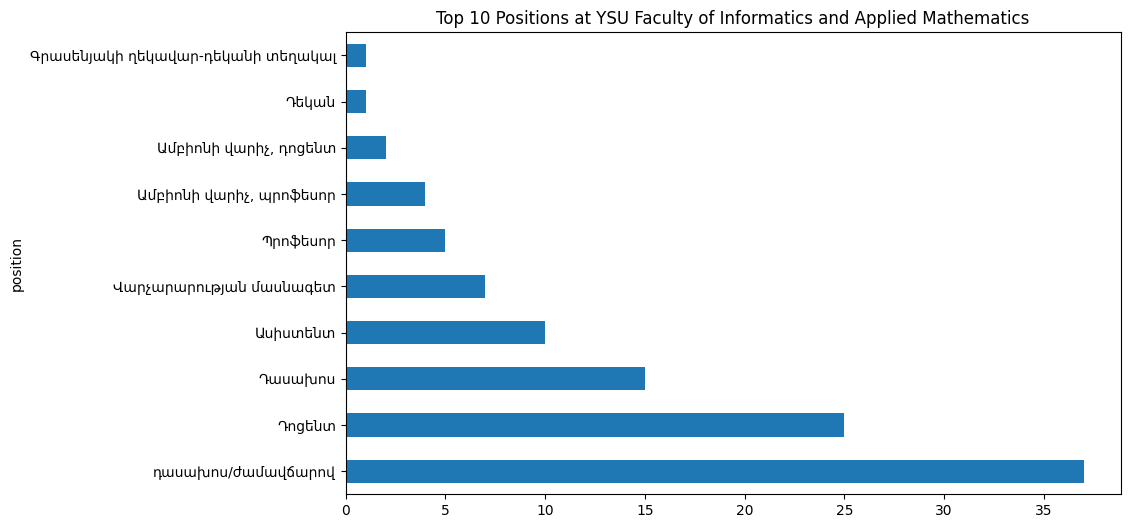

In [21]:
import pandas as pd

df = pd.DataFrame(res)

df.position.value_counts().head(10).plot(kind="barh", figsize=(10, 6), title="Top 10 Positions at YSU Faculty of Informatics and Applied Mathematics")

## Per person

In [ ]:
import os
from joblib import Parallel, delayed

BASE_URL = "https://www.ysu.am"

SAVE_DIR = "downloaded_htmls"
os.makedirs(SAVE_DIR, exist_ok=True)

def clean_name(name):
    return name.strip().replace(" ", "_").replace("\n", "")


def fetch_year_of_birth(i, row):
    url = BASE_URL + row["url"]
    response = requests.get(url)
    # Save HTML
    filename = f"{SAVE_DIR}/{i}_{clean_name(row['name'])}.html"
    
    if filename in os.listdir(SAVE_DIR):
        print(f"Skipping {filename}, already exists.")
        return i, "Already exists"
    
    with open(filename, "w", encoding="utf-8") as f:
        f.write(response.text)
    soup = BeautifulSoup(response.content, "html.parser")
    personal_info = soup.find("div", class_ = "personal-information")
    date_of_birth = personal_info.find("div", class_="fw-bold d-flex field field--name-field-user-date-of-birth field--type-datetime field--label-above")
    date_of_birth_text_list = date_of_birth.text.strip().split("\n")
    title = date_of_birth_text_list[0]
    year = date_of_birth_text_list[1]
    if title == "Ծննդյան տարեթիվ":
        year_of_birth = year
    else:
        year_of_birth = "Unknown"
        
        
        
    return i, year_of_birth

results = Parallel(n_jobs=4)(
    delayed(fetch_year_of_birth)(i, row) for i, row in df.iterrows()
)

for i, year_of_birth in results:
    df.loc[i, "year"] = year_of_birth


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.

In [54]:
df

,name,position,url,img,year
0,Արթուր\n Արտուշի\n Սահակյան,Դեկան,/user/199,/sites/default/files/styles/medium_profile/pub...,1956
1,Դավիթ\n Մելսի\n Մինասյան,Գրասենյակի ղեկավար-դեկանի տեղակալ,/user/990,/sites/default/files/styles/medium_profile/pub...,1977
2,Վարուժան\n Սերյոժայի\n Աթաբեկյան,"Ամբիոնի վարիչ, պրոֆեսոր",/user/221,/sites/default/files/styles/medium_profile/pub...,1962
3,Կարեն\n Լարիկի\n Ավետիսյան,"Ամբիոնի վարիչ, պրոֆեսոր",/user/204,/sites/default/files/styles/medium_profile/pub...,1966
4,Կարինե\n Ռուբենի\n Ավետիսյան,"Ամբիոնի վարիչ, դոցենտ",/user/65,/sites/default/files/styles/medium_profile/pub...,1977
...,...,...,...,...,...
103,Լուսինե\n Միքայելի\n Հակոբյան,Վարչարարության մասնագետ,/user/1339,/sites/default/files/styles/medium_profile/pub...,NaN
104,Տիգրանուհի\n Կարապետի\n Հովհաննիսյան,Վարչարարության մասնագետ,/user/3104,/sites/default/files/styles/medium_profile/pub...,NaN
105,Արաքս\n Հրայրի\n Մարգարյան,Վարչարարության մասնագետ,/user/52,/sites/default/files/styles/medium_profile/pub...,NaN
106,Լուսինե\n Աշոտի\n Ռաշոյան,Վարչարարության մասնագետ,/user/988,/sites/default/files/styles/medium_profile/pub...,NaN


In [ ]:
date_of_birth.text.strip().split("\n")[1]

['Ծննդյան տարեթիվ', '1977']

# 🏡Տնային


# 🎲 00
- ▶️[Video]()
- 🔗[Random link]()
- 🇦🇲🎶[]()
- 🌐🎶[]()
- 🤌[Կարգին]()


<a href="http://s01.flagcounter.com/more/1oO"><img src="https://s01.flagcounter.com/count2/1oO/bg_FFFFFF/txt_000000/border_CCCCCC/columns_2/maxflags_10/viewers_0/labels_0/pageviews_1/flags_0/percent_0/" alt="Flag Counter"></a>
